In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [2]:
shop_dates = pd.read_csv("exam_data/shop_sales_dates.csv")
shop_dates

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1
4,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,2016-01-17,11551,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1815,0,0,0
1815,2016-01-18,11551,Monday,3,1,2016,MartinLutherKingDay,National,NaN,NaN,1816,0,0,0
1816,2016-01-19,11551,Tuesday,4,1,2016,NaN,NaN,NaN,NaN,1817,0,0,0
1817,2016-01-20,11551,Wednesday,5,1,2016,NaN,NaN,NaN,NaN,1818,0,0,0


In [3]:
shop_dates.info()
shop_dates.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1819 non-null   object
 1   wm_yr_wk          1819 non-null   int64 
 2   weekday           1819 non-null   object
 3   wday              1819 non-null   int64 
 4   month             1819 non-null   int64 
 5   year              1819 non-null   int64 
 6   event_name_1      146 non-null    object
 7   event_type_1      146 non-null    object
 8   event_name_2      4 non-null      object
 9   event_type_2      4 non-null      object
 10  date_id           1819 non-null   int64 
 11  CASHBACK_STORE_1  1819 non-null   int64 
 12  CASHBACK_STORE_2  1819 non-null   int64 
 13  CASHBACK_STORE_3  1819 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 199.1+ KB


1819

In [4]:
shop_dates_1 = shop_dates[shop_dates["CASHBACK_STORE_1"] == 1]
shop_dates_2 = shop_dates[shop_dates["CASHBACK_STORE_2"] == 1]
shop_dates_2.drop(["CASHBACK_STORE_1", "CASHBACK_STORE_3"], axis=1, inplace=True)
shop_dates_3 = shop_dates[shop_dates["CASHBACK_STORE_3"] == 1]

shop_dates.shape[0] == (
    shop_dates_1.shape[0] + shop_dates_2.shape[0] + shop_dates_3.shape[0]
)

C:\Users\79270\AppData\Local\Temp\ipykernel_20268\2540265520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_dates_2.drop(["CASHBACK_STORE_1", "CASHBACK_STORE_3"], axis=1, inplace=True)


False

In [5]:
shop_dates_1.shape[0] + shop_dates_2.shape[0] + shop_dates_3.shape[0]

1800

In [6]:
shop_prices = pd.read_csv("exam_data/shop_sales_prices.csv")
shop_prices

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58


In [7]:
shop_prices_2 = shop_prices[shop_prices["store_id"] == "STORE_2"]
shop_prices_2

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11106,STORE_2,STORE_2_586,11551,1.68
11107,STORE_2,STORE_2_587,11551,2.48
11108,STORE_2,STORE_2_681,11551,1.00
11109,STORE_2,STORE_2_714,11551,1.58


In [8]:
shop_sales = pd.read_csv("exam_data/shop_sales.csv")
shop_sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [9]:
shop_sales_2 = shop_sales[shop_sales["store_id"] == "STORE_2"]
shop_sales_2 = shop_sales_2[["store_id", "item_id", "date_id", "cnt"]]
shop_sales_2

,store_id,item_id,date_id,cnt
0,STORE_2,STORE_2_085,1,3
1,STORE_2,STORE_2_085,2,8
2,STORE_2,STORE_2_085,3,0
3,STORE_2,STORE_2_085,4,3
4,STORE_2,STORE_2_085,5,0
...,...,...,...,...
27280,STORE_2,STORE_2_716,1815,2
27281,STORE_2,STORE_2_716,1816,1
27282,STORE_2,STORE_2_716,1817,1
27283,STORE_2,STORE_2_716,1818,1


In [10]:
merged_date_all = pd.merge(shop_dates_2, shop_prices_2, on="wm_yr_wk", how="left")
merged_date_all

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_2,store_id,item_id,sell_price
0,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_085,1.00
1,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_043,2.88
2,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_054,2.28
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_090,1.25
4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_252,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_586,1.68
8522,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_587,2.48
8523,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_681,1.00
8524,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_714,1.58


In [11]:
merged_date_2 = pd.merge(shop_dates, shop_prices_2, on="wm_yr_wk", how="left")
merged_date_2

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3,store_id,item_id,sell_price
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0,STORE_2,STORE_2_085,1.00
1,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0,STORE_2,STORE_2_043,2.88
2,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0,STORE_2,STORE_2_054,2.28
3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0,STORE_2,STORE_2_090,1.25
4,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0,STORE_2,STORE_2_252,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25859,2016-01-21,11551,Thursday,6,1,2016,NaN,NaN,NaN,NaN,1819,0,0,0,STORE_2,STORE_2_586,1.68
25860,2016-01-21,11551,Thursday,6,1,2016,NaN,NaN,NaN,NaN,1819,0,0,0,STORE_2,STORE_2_587,2.48
25861,2016-01-21,11551,Thursday,6,1,2016,NaN,NaN,NaN,NaN,1819,0,0,0,STORE_2,STORE_2_681,1.00
25862,2016-01-21,11551,Thursday,6,1,2016,NaN,NaN,NaN,NaN,1819,0,0,0,STORE_2,STORE_2_714,1.58


In [12]:
print(f"Original prices rows: {len(shop_dates)}")
print(f"Original sales rows: {len(shop_prices_2)}")
print(f"Merged rows: {len(merged_date_2)}")
print(f"Unique items merged: {merged_date_2['item_id'].nunique()}")

Original prices rows: 1819
Original sales rows: 3697
Merged rows: 25864
Unique items merged: 15


In [ ]:
# Items in prices but not in sales
missing_in_sales = shop_sales_2[
    ~shop_prices_2["item_id"].isin(shop_prices_2["item_id"])
]

# Items in sales but not in prices
missing_in_prices = shop_prices_2[
    ~shop_prices_2["item_id"].isin(shop_sales_2["item_id"])
]

C:\Users\79270\AppData\Local\Temp\ipykernel_6156\3154254616.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_in_sales = shop_sales_2[~shop_prices_2['item_id'].isin(shop_prices_2['item_id'])]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# sales_modeling = shop_sales_2.merge(shop_prices_2, on='item_id', how='left')
# sales_modeling

merged_df = pd.merge(
    shop_sales_2, merged_date_all, on=["item_id", "store_id", "date_id"], how="left"
)
merged_df

,store_id,item_id,date_id,cnt,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_2,sell_price
0,STORE_2,STORE_2_085,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STORE_2,STORE_2_085,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STORE_2,STORE_2_085,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STORE_2,STORE_2_085,4,3,2011-02-01,11101.0,Tuesday,4.0,2.0,2011.0,NaN,NaN,NaN,NaN,1.0,1.0
4,STORE_2,STORE_2_085,5,0,2011-02-02,11101.0,Wednesday,5.0,2.0,2011.0,NaN,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27280,STORE_2,STORE_2_716,1815,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27281,STORE_2,STORE_2_716,1816,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27282,STORE_2,STORE_2_716,1817,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27283,STORE_2,STORE_2_716,1818,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_sales_prices = pd.merge(
    shop_sales_2, shop_prices_2, on=["item_id", "store_id"], how="left"
)
merged_sales_prices

,store_id,item_id,date_id,cnt,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,1,3,11101,1.00
1,STORE_2,STORE_2_085,1,3,11102,1.00
2,STORE_2,STORE_2_085,1,3,11103,1.00
3,STORE_2,STORE_2_085,1,3,11104,1.00
4,STORE_2,STORE_2_085,1,3,11105,1.00
...,...,...,...,...,...,...
6724838,STORE_2,STORE_2_716,1819,0,11547,1.28
6724839,STORE_2,STORE_2_716,1819,0,11548,1.28
6724840,STORE_2,STORE_2_716,1819,0,11549,1.28
6724841,STORE_2,STORE_2_716,1819,0,11550,1.28


In [ ]:
merged_new = pd.merge(
    merged_date_all,
    merged_sales_prices,
    on=["date_id", "wm_yr_wk", "store_id", "sell_price", "item_id"],
    how="left",
)
merged_new

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_2,store_id,item_id,sell_price,cnt
0,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_085,1.00,3
1,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_043,2.88,1
2,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_054,2.28,10
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_090,1.25,120
4,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,1,STORE_2,STORE_2_252,1.48,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_586,1.68,70
8522,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_587,2.48,40
8523,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_681,1.00,29
8524,2016-01-10,11550,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1808,1,STORE_2,STORE_2_714,1.58,20


In [17]:
merged_new.isnull().sum()

date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1        7817
event_type_1        7817
event_name_2        8512
event_type_2        8512
date_id                0
CASHBACK_STORE_2       0
store_id               0
item_id                0
sell_price             0
cnt                    0
dtype: int64

In [ ]:
merged_new[["event_name_1", "event_type_1", "event_name_2", "event_type_2"]] = (
    merged_new[["event_name_1", "event_type_1", "event_name_2", "event_type_2"]].fillna(
        "None"
    )
)

## EDA

In [ ]:
merged_new["date"] = pd.to_datetime(merged_new["date"])
# merged_new

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_2,store_id,item_id,sell_price,cnt
0,2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_085,1.00,3
1,2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_043,2.88,1
2,2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_054,2.28,10
3,2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_090,1.25,120
4,2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_252,1.48,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_586,1.68,70
8522,2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_587,2.48,40
8523,2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_681,1.00,29
8524,2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_714,1.58,20


In [ ]:
merged_new.set_index("date", inplace=True)

In [ ]:
merged_new["revenue"] = merged_new["cnt"] * merged_new["sell_price"]

In [24]:
import matplotlib.pyplot as plt

In [32]:
merged_new

,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_2,store_id,item_id,sell_price,cnt,revenue
date,,,,,,,,,,,,,,,,
2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_085,1.00,3,3.00
2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_043,2.88,1,2.88
2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_054,2.28,10,22.80
2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_090,1.25,120,150.00
2011-02-01,11101,Tuesday,4,2,2011,None,None,None,None,4,1,STORE_2,STORE_2_252,1.48,37,54.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_586,1.68,70,117.60
2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_587,2.48,40,99.20
2016-01-10,11550,Sunday,2,1,2016,None,None,None,None,1808,1,STORE_2,STORE_2_681,1.00,29,29.00


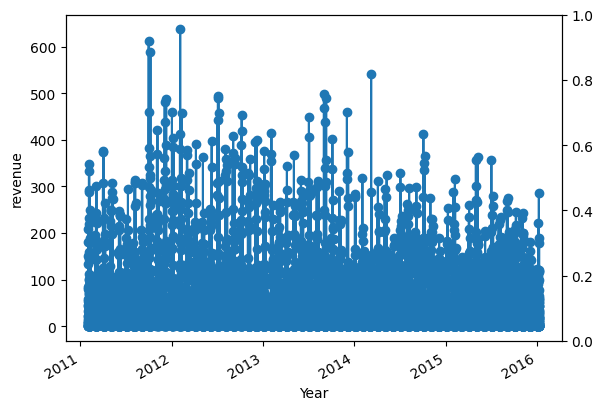

In [ ]:
ax = merged_new.plot(y="revenue", legend=False, marker="o")
ax.set_ylabel("revenue")
ax1 = ax.twinx()
ax.set_xlabel("Year")
plt.xticks(rotation=90);

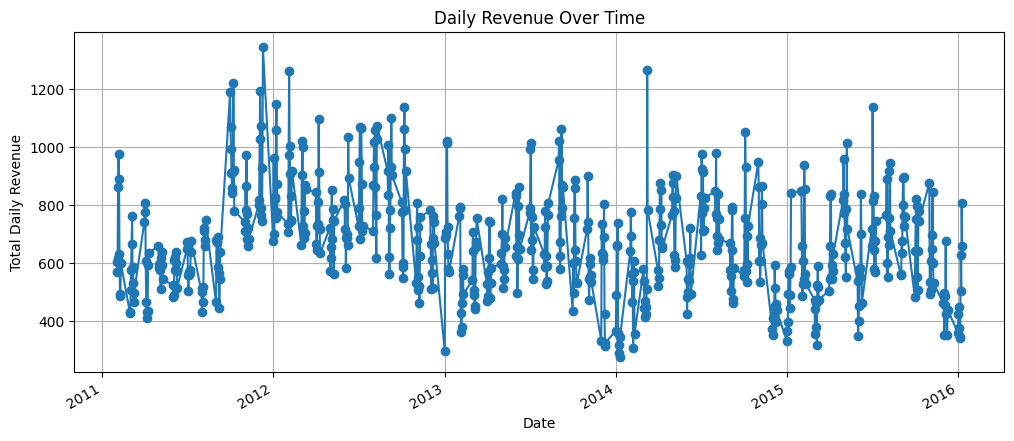

In [ ]:
daily_revenue = merged_new.groupby(merged_new.index).revenue.sum()

# Plot as a time series
ax = daily_revenue.plot(figsize=(12, 5), marker="o", linestyle="-")
ax.set_ylabel("Total Daily Revenue")
ax.set_xlabel("Date")
plt.title("Daily Revenue Over Time")
plt.grid(True)
plt.show()

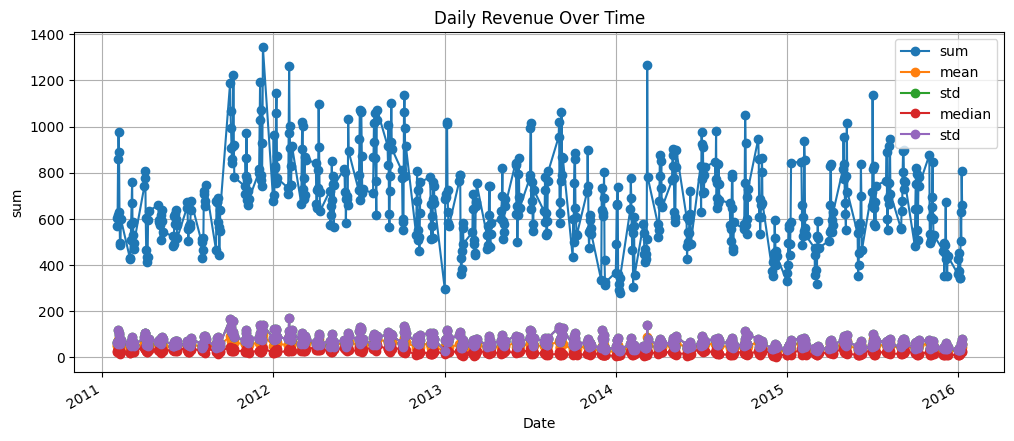

In [ ]:
daily_revenue_exp = merged_new.groupby(merged_new.index)["revenue"].agg(
    ["sum", "mean", "std", "median", "std"]
)

# Plot as a time series
ax = daily_revenue_exp.plot(figsize=(12, 5), marker="o", linestyle="-")
ax.set_ylabel("sum")
ax.set_xlabel("Date")
plt.title("Daily Revenue Over Time")
plt.grid(True)
plt.show()

In [46]:
daily_revenue_exp

,sum,mean,std,median,std
date,,,,,
2011-02-01,603.13,50.260833,66.115508,22.500,66.115508
2011-02-02,567.72,47.310000,58.444940,26.840,58.444940
2011-02-03,616.54,51.378333,57.655842,30.140,57.655842
2011-02-04,860.37,71.697500,117.531698,27.530,117.531698
2011-02-05,976.34,81.361667,103.613226,34.075,103.613226
...,...,...,...,...,...
2016-01-06,340.25,22.683333,29.551755,11.250,29.551755
2016-01-07,627.33,41.822000,58.164236,23.760,58.164236
2016-01-08,503.87,33.591333,46.452148,20.000,46.452148


# EDA

### Визуальный анализ

Тренд, сезонность, цикл, ошибка

Тренд, сезонность, резкое изменение поведения вр, выбросы

- _Тренд._ Ярковыраженного тренда на всем протяжении не наблюдается. На отрезке от конца 2011 года до 2013 есть тренд на понижение
- _Сезонность._ После 2012 года наблюдается сезонность где, минимум достигается в начале и в конце года, а в середине наборот пики
- _Резкое изменение поведения ВР._ В середине 2011 года ВР показатели выручки значительно выросли. Наблюдается резкое изменение зависимостей.
- _Выбросы._ ВР изобилует выбросами. В начале 2011 года, в 2013 годе и особенно в начеле 2014 года наблюдаются ярковыроженные выбросы
- _Показатели дисперсии._ На отрезке 2011 по 2012 год дисперсия сильно меньше чем от 2012 и далее

__Определенно мы имеем дело с нестационарным временным рядом__

### Инструменты выделения тренда

In [ ]:
type(daily_revenue_exp["sum"])

pandas.core.series.Series

In [ ]:
daily_revenue_exp["num"] = np.arange(daily_revenue_exp.shape[0])
daily_revenue_exp

,sum,mean,std,median,std,num
date,,,,,,
2011-02-01,603.13,50.260833,66.115508,22.500,66.115508,0
2011-02-02,567.72,47.310000,58.444940,26.840,58.444940,1
2011-02-03,616.54,51.378333,57.655842,30.140,57.655842,2
2011-02-04,860.37,71.697500,117.531698,27.530,117.531698,3
2011-02-05,976.34,81.361667,103.613226,34.075,103.613226,4
...,...,...,...,...,...,...
2016-01-06,340.25,22.683333,29.551755,11.250,29.551755,595
2016-01-07,627.33,41.822000,58.164236,23.760,58.164236,596
2016-01-08,503.87,33.591333,46.452148,20.000,46.452148,597


In [ ]:
linear_trend_model = sm.OLS(daily_revenue_exp["sum"], daily_revenue_exp["num"]).fit()

In [ ]:
daily_revenue_exp["TREND"] = linear_trend_model.predict(daily_revenue_exp["num"])


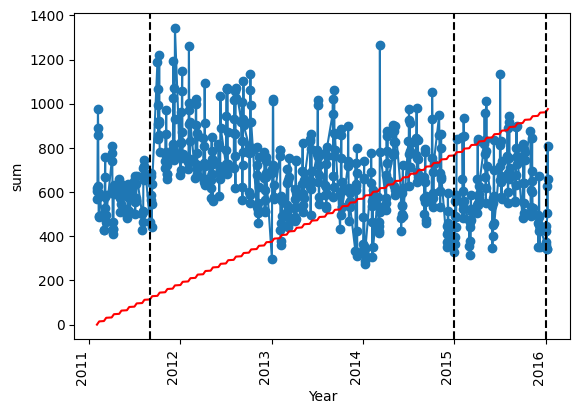

In [ ]:
ax = daily_revenue_exp.plot(y="sum", legend=False, marker="o")
daily_revenue_exp.plot(y="TREND", legend=False, ax=ax, c="red")
ax.set_ylabel("sum")
ax.set_xlabel("Year")
plt.axvline(["2011-9-1"], c="black", linestyle="--")
plt.axvline(["2013-1-1"], c="black", linestyle="--")
plt.axvline(["2014-1-1"], c="black", linestyle="--")
plt.axvline(["2015-1-1"], c="black", linestyle="--")
plt.axvline(["2016-1-1"], c="black", linestyle="--")
plt.xticks(rotation=90);

In [ ]:
decline_trend = daily_revenue_exp.loc["2011-11-1":"2013-1-1"]

C:\Users\79270\AppData\Local\Temp\ipykernel_20268\2881178126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decline_trend['TREND'] = linear_trend_model_short.predict(decline_trend['num'])


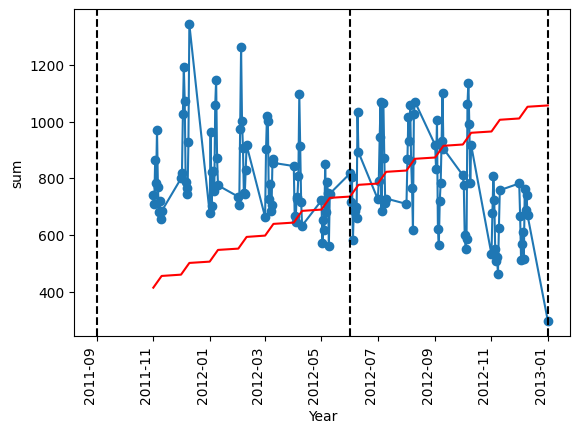

In [ ]:
linear_trend_model_short = sm.OLS(decline_trend["sum"], decline_trend["num"]).fit()
decline_trend["TREND"] = linear_trend_model_short.predict(decline_trend["num"])

ax = decline_trend.plot(y="sum", legend=False, marker="o")
decline_trend.plot(y="TREND", legend=False, ax=ax, c="red")
ax.set_ylabel("sum")
ax.set_xlabel("Year")
plt.axvline(["2011-9-1"], c="black", linestyle="--")
plt.axvline(["2012-6-1"], c="black", linestyle="--")
plt.axvline(["2013-1-1"], c="black", linestyle="--")
# plt.axvline(['2016-1-1'],c='black',linestyle='--')
plt.xticks(rotation=90);

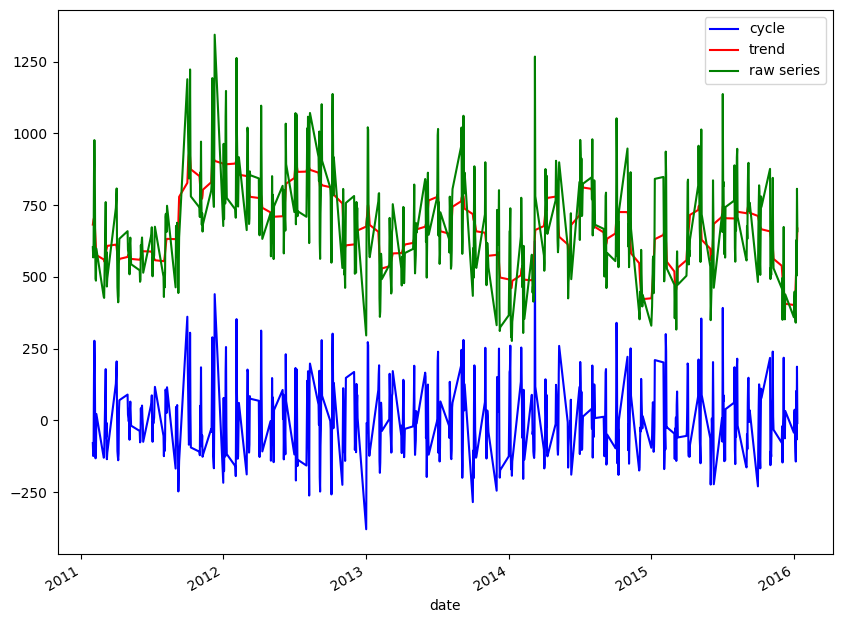

In [ ]:
# Фильтр Ходрика-Прескотта
cycle, trend = sm.tsa.filters.hpfilter(daily_revenue_exp["sum"], lamb=60)
plt.figure(figsize=(10, 8))
cycle.plot(c="blue", label="cycle")
trend.plot(c="red", label="trend")
daily_revenue_exp["sum"].plot(c="green", label="raw series")
plt.legend();

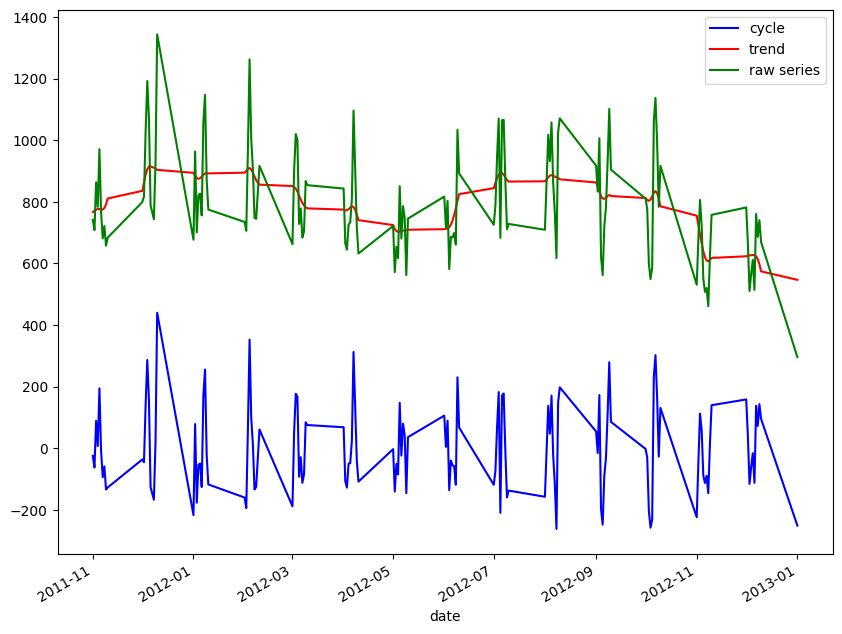

In [ ]:
cycle_short, trend_short = sm.tsa.filters.hpfilter(decline_trend["sum"], lamb=60)
plt.figure(figsize=(10, 8))
cycle_short.plot(c="blue", label="cycle")
trend_short.plot(c="red", label="trend")
decline_trend["sum"].plot(c="green", label="raw series")
plt.legend();

### Сигмоидный тренд с насыщением

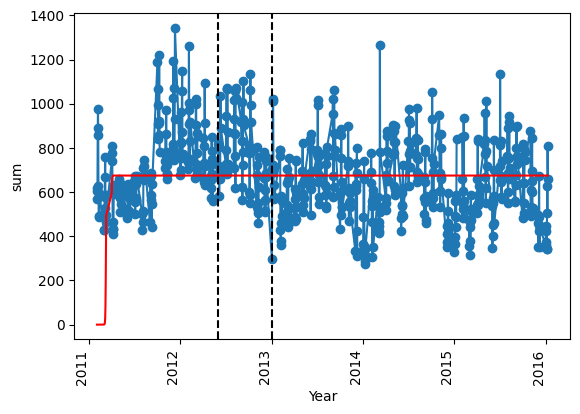

In [ ]:
daily_revenue_exp["obs_num_sigm"] = 1 / (
    1.0 + np.exp(-1 * (daily_revenue_exp["num"] - 18))
)
linear_trend_sigmoid = sm.OLS(
    daily_revenue_exp["sum"], daily_revenue_exp["obs_num_sigm"]
).fit()
daily_revenue_exp["TREND_SIGMOID"] = linear_trend_sigmoid.predict(
    daily_revenue_exp["obs_num_sigm"]
)


# linear_trend_model_short = sm.OLS(decline_trend['sum'], decline_trend['num']).fit()
# decline_trend['TREND'] = linear_trend_model_short.predict(decline_trend['num'])

ax = daily_revenue_exp.plot(y="sum", legend=False, marker="o")
daily_revenue_exp.plot(y="TREND_SIGMOID", legend=False, ax=ax, c="red")
ax.set_ylabel("sum")
ax.set_xlabel("Year")
# plt.axvline(['2011-9-1'],c='black',linestyle='--')
plt.axvline(["2012-6-1"], c="black", linestyle="--")
plt.axvline(["2013-1-1"], c="black", linestyle="--")
# plt.axvline(['2016-1-1'],c='black',linestyle='--')
plt.xticks(rotation=90);

### Кусочно-линейный тренд


In [ ]:
from scipy.signal import detrend

detrended_piecewise = detrend(daily_revenue_exp["sum"], bp=[15, 24, 30])
daily_revenue_exp["TREND_PIECE_LIN"] = daily_revenue_exp["sum"] - detrended_piecewise

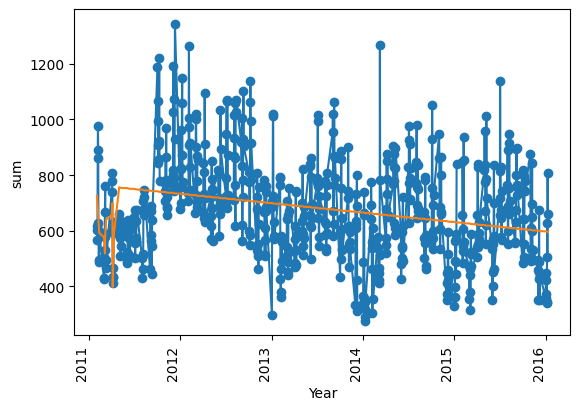

In [ ]:
ax = daily_revenue_exp.plot(y="sum", legend=False, marker="o")
daily_revenue_exp.plot(y="TREND_PIECE_LIN", legend=False, ax=ax)
ax.set_ylabel("sum")
ax.set_xlabel("Year")
plt.xticks(rotation=90);

C:\Users\79270\AppData\Local\Temp\ipykernel_20268\433781065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decline_trend['TREND_PIECE_LIN'] = decline_trend['sum'] - detrended_piecewise_short


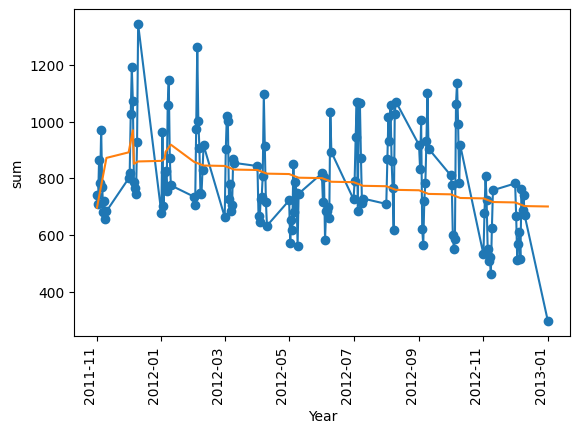

In [ ]:
detrended_piecewise_short = detrend(decline_trend["sum"], bp=[15, 24, 30])
decline_trend["TREND_PIECE_LIN"] = decline_trend["sum"] - detrended_piecewise_short

ax = decline_trend.plot(y="sum", legend=False, marker="o")
decline_trend.plot(y="TREND_PIECE_LIN", legend=False, ax=ax)
ax.set_ylabel("sum")
ax.set_xlabel("Year")
plt.xticks(rotation=90);

In [ ]:
daily_revenue_exp["TREND_smoothed"] = (
    daily_revenue_exp["sum"].rolling(5, center=True).mean()
)
# gdp[' GDP ( Billions of US $) desmoothed'] = gdp[' GDP ( Billions of US $)'] - gdp[' GDP ( Billions of US $) smoothed']

In [ ]:
daily_revenue_exp["sum diff"] = daily_revenue_exp["sum"] - daily_revenue_exp[
    "sum"
].shift(1)
daily_revenue_exp["sum rel"] = (
    daily_revenue_exp["sum"] / daily_revenue_exp["sum"].shift(1) - 1
)

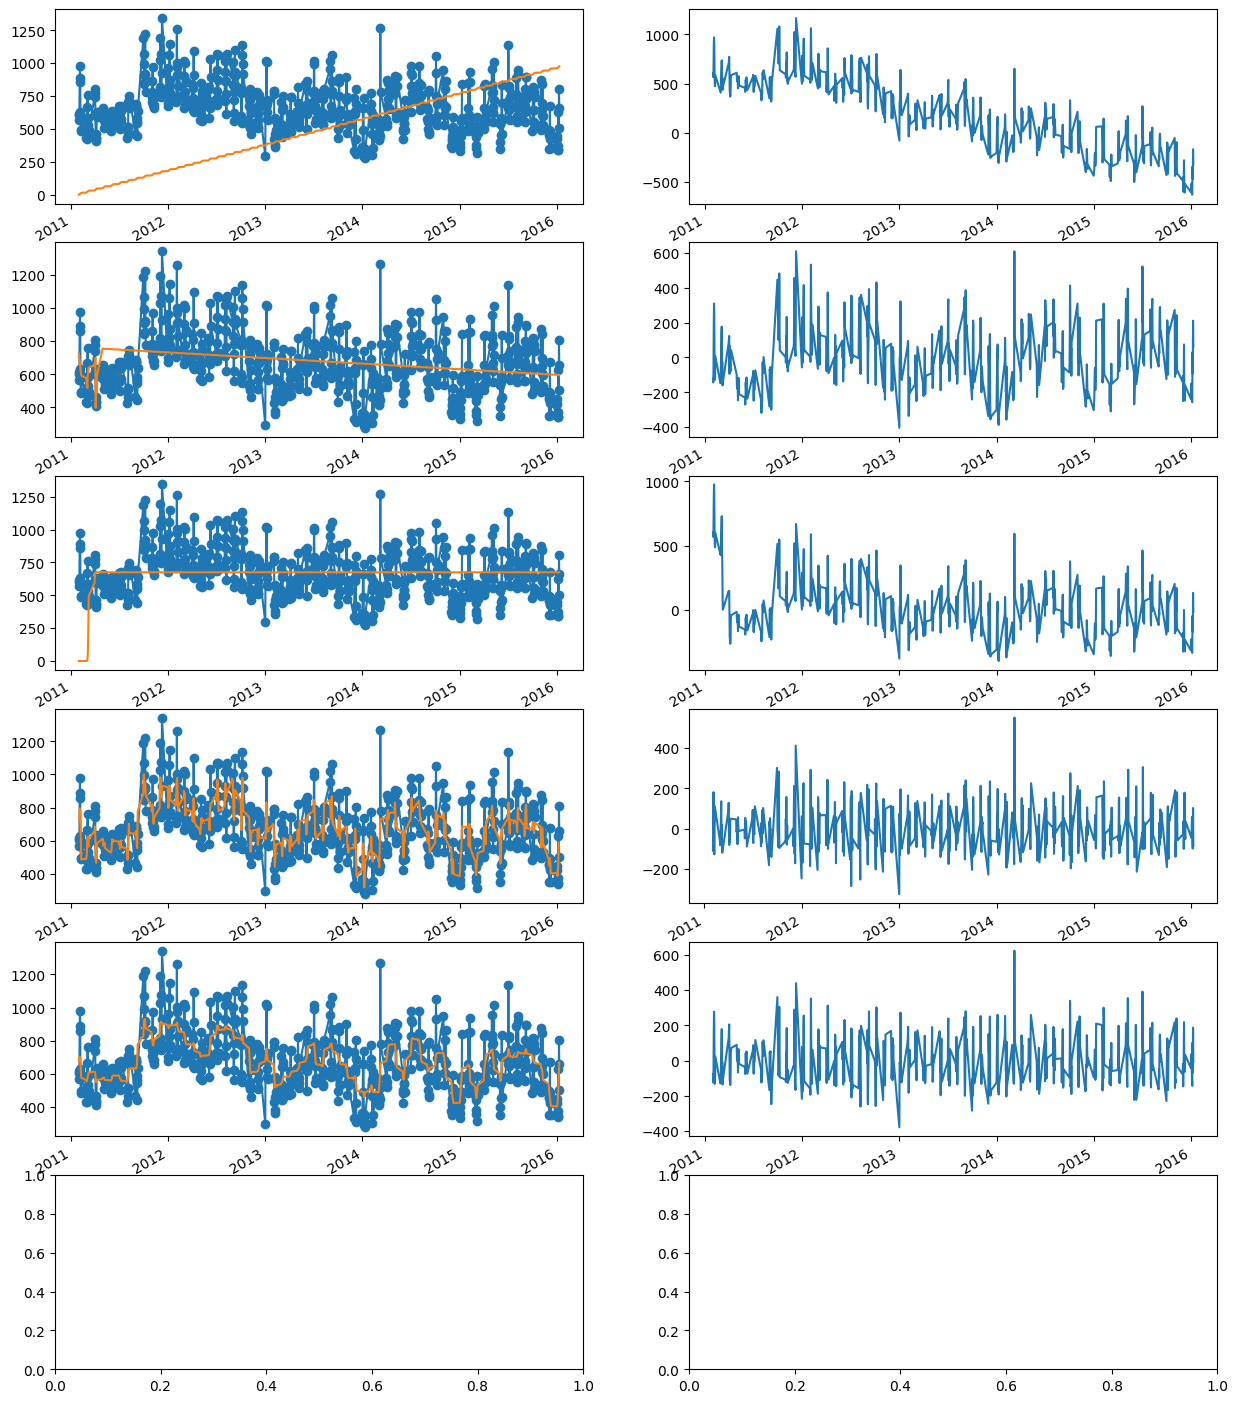

In [ ]:
N_COLS = 2
trends_list = [
    daily_revenue_exp["TREND"],
    daily_revenue_exp["TREND_PIECE_LIN"],
    daily_revenue_exp["TREND_SIGMOID"],
    daily_revenue_exp["TREND_smoothed"],
    trend,
]

fig, ax = plt.subplots(len(trends_list) + 1, N_COLS, figsize=(15, 20))

for i, trend_est in enumerate(trends_list):
    daily_revenue_exp.plot(y="sum", legend=False, marker="o", label="gdp", ax=ax[i][0])
    trend_est.plot(ax=ax[i][0])

    (daily_revenue_exp["sum"] - trend_est).plot(ax=ax[i][1])


(daily_revenue_exp["sum diff"]).plot(ax=ax[len(trends_list)][0])
(daily_revenue_exp["sum rel"]).plot(ax=ax[len(trends_list)][1])

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
)

metrics = [mean_absolute_error, r2_score, mean_squared_error, mean_squared_log_error]

In [ ]:
import seaborn as sns

cm = sns.light_palette(
    "green",
    as_cmap=True,
    reverse=True,
)
error_df = pd.DataFrame(
    [
        [
            metr(daily_revenue_exp[tren.notna()]["sum"], tren[tren.notna()])
            for metr in metrics
        ]
        for tren in trends_list
    ],
    index=[tren.name for tren in trends_list],
    columns=[metr.__name__ for metr in metrics],
)

error_df.style.background_gradient(cmap=cm)

,mean_absolute_error,r2_score,mean_squared_error,mean_squared_log_error
TREND,338.004415,-4.006545,167277.195247,1.452373
TREND_PIECE_LIN,140.795980,0.078524,30788.078537,0.071544
TREND_SIGMOID,159.537046,-0.327606,44357.579940,1.016738
TREND_smoothed,82.184537,0.668757,11122.799466,0.024016
sum_trend,102.464546,0.506195,16498.879760,0.036740


### Оценка стационарности

In [ ]:
import warnings

from statsmodels.tsa.stattools import adfuller, kpss

warnings.filterwarnings("ignore")

stattests = [adfuller, kpss]
stattests = [adfuller, kpss]
remains = [
    (daily_revenue_exp["sum"] - trend_est).dropna() for trend_est in trends_list
] + [daily_revenue_exp["sum diff"].dropna(), daily_revenue_exp["sum rel"].dropna()]

ramains_name = [trend_est.name for trend_est in trends_list] + ["diff", "rel"]

In [ ]:
error_df = pd.DataFrame(
    [[metr(tren)[1] for metr in stattests] for tren in remains],
    index=ramains_name,
    columns=[metr.__name__ for metr in stattests],
)

error_df

C:\Users\79270\AppData\Local\Temp\ipykernel_20268\3958534635.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  error_df = pd.DataFrame([[metr(tren)[1] for metr in stattests] for tren in remains],
C:\Users\79270\AppData\Local\Temp\ipykernel_20268\3958534635.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  error_df = pd.DataFrame([[metr(tren)[1] for metr in stattests] for tren in remains],
C:\Users\79270\AppData\Local\Temp\ipykernel_20268\3958534635.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  error_df = pd.DataFrame([[metr(tren)[1] for metr in stattests] for tren in remains],
C:\Users\79270\AppData\Local\Temp\ipy

,adfuller,kpss
TREND,8.541969e-01,0.01
TREND_PIECE_LIN,1.041491e-04,0.10
TREND_SIGMOID,2.496428e-06,0.01
TREND_smoothed,2.493502e-17,0.10
sum_trend,2.000320e-21,0.10
diff,4.188761e-17,0.10
rel,8.597678e-20,0.10


## Выделение сезонности

C:\Users\79270\AppData\Local\Temp\ipykernel_20268\1545594318.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


<Figure size 1200x1000 with 0 Axes>

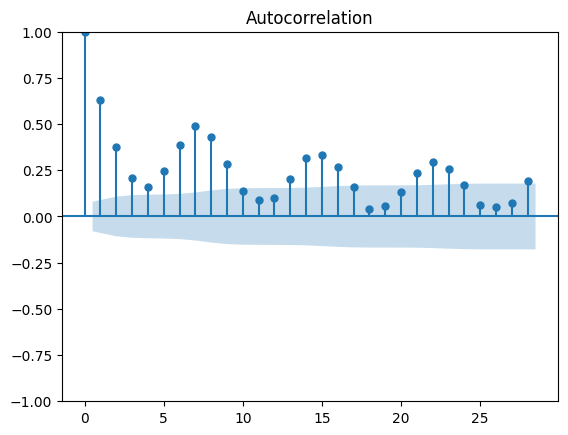

In [ ]:
from statsmodels.graphics import tsaplots

fig = plt.figure(figsize=(12, 10))
tsaplots.plot_acf(daily_revenue_exp["sum"])
fig.show();

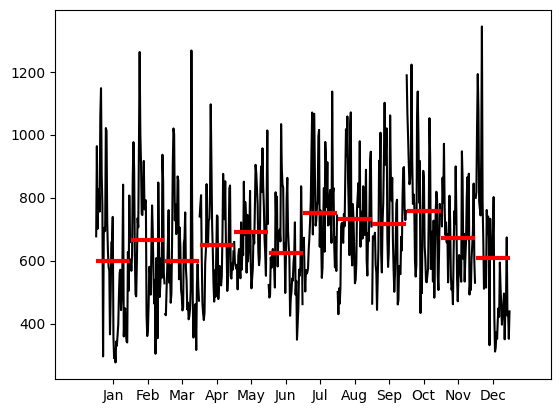

In [ ]:
from copy import copy

revenue_exp_copy = copy(daily_revenue_exp)
monthly_index = revenue_exp_copy.index.to_period("M")
revenue_exp_copy.index = monthly_index

# Step 3: Now run month_plot
tsaplots.month_plot(revenue_exp_copy["sum"]);

In [110]:
# ax = revenue_exp_copy['sum'].plot(figsize=(12, 5), marker='o', linestyle='-')
# ax.set_ylabel("Total Daily Revenue")
# ax.set_xlabel("Date")
# plt.title("Daily Revenue Over Time")
# plt.grid(True)
# plt.show()
revenue_exp_copy

,sum,mean,std,median,std,num,TREND,obs_num_sigm,TREND_SIGMOID,TREND_PIECE_LIN,TREND_smoothed,sum diff,sum rel
date,,,,,,,,,,,,,
2011-02,603.13,50.260833,66.115508,22.500,66.115508,0,0.000000,1.522998e-08,0.000010,725.813083,NaN,NaN,NaN
2011-02,567.72,47.310000,58.444940,26.840,58.444940,1,1.629807,4.139938e-08,0.000028,710.967976,NaN,-35.41,-0.058710
2011-02,616.54,51.378333,57.655842,30.140,57.655842,2,3.259613,1.125352e-07,0.000076,696.122869,724.820,48.82,0.085993
2011-02,860.37,71.697500,117.531698,27.530,117.531698,3,4.889420,3.059022e-07,0.000206,681.277762,782.322,243.83,0.395481
2011-02,976.34,81.361667,103.613226,34.075,103.613226,4,6.519226,8.315280e-07,0.000561,666.432655,794.664,115.97,0.134791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01,340.25,22.683333,29.551755,11.250,29.551755,595,969.734932,1.000000e+00,675.044665,596.675735,437.668,-3.02,-0.008798
2016-01,627.33,41.822000,58.164236,23.760,58.164236,596,971.364739,1.000000e+00,675.044665,596.393423,524.294,287.08,0.843733
2016-01,503.87,33.591333,46.452148,20.000,46.452148,597,972.994545,1.000000e+00,675.044665,596.111110,587.438,-123.46,-0.196802


C:\Users\79270\AppData\Local\Temp\ipykernel_20268\3215319728.py:12: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.pointplot(x="month", y="sum", hue="year", data=revenue_copy,palette=cmap)


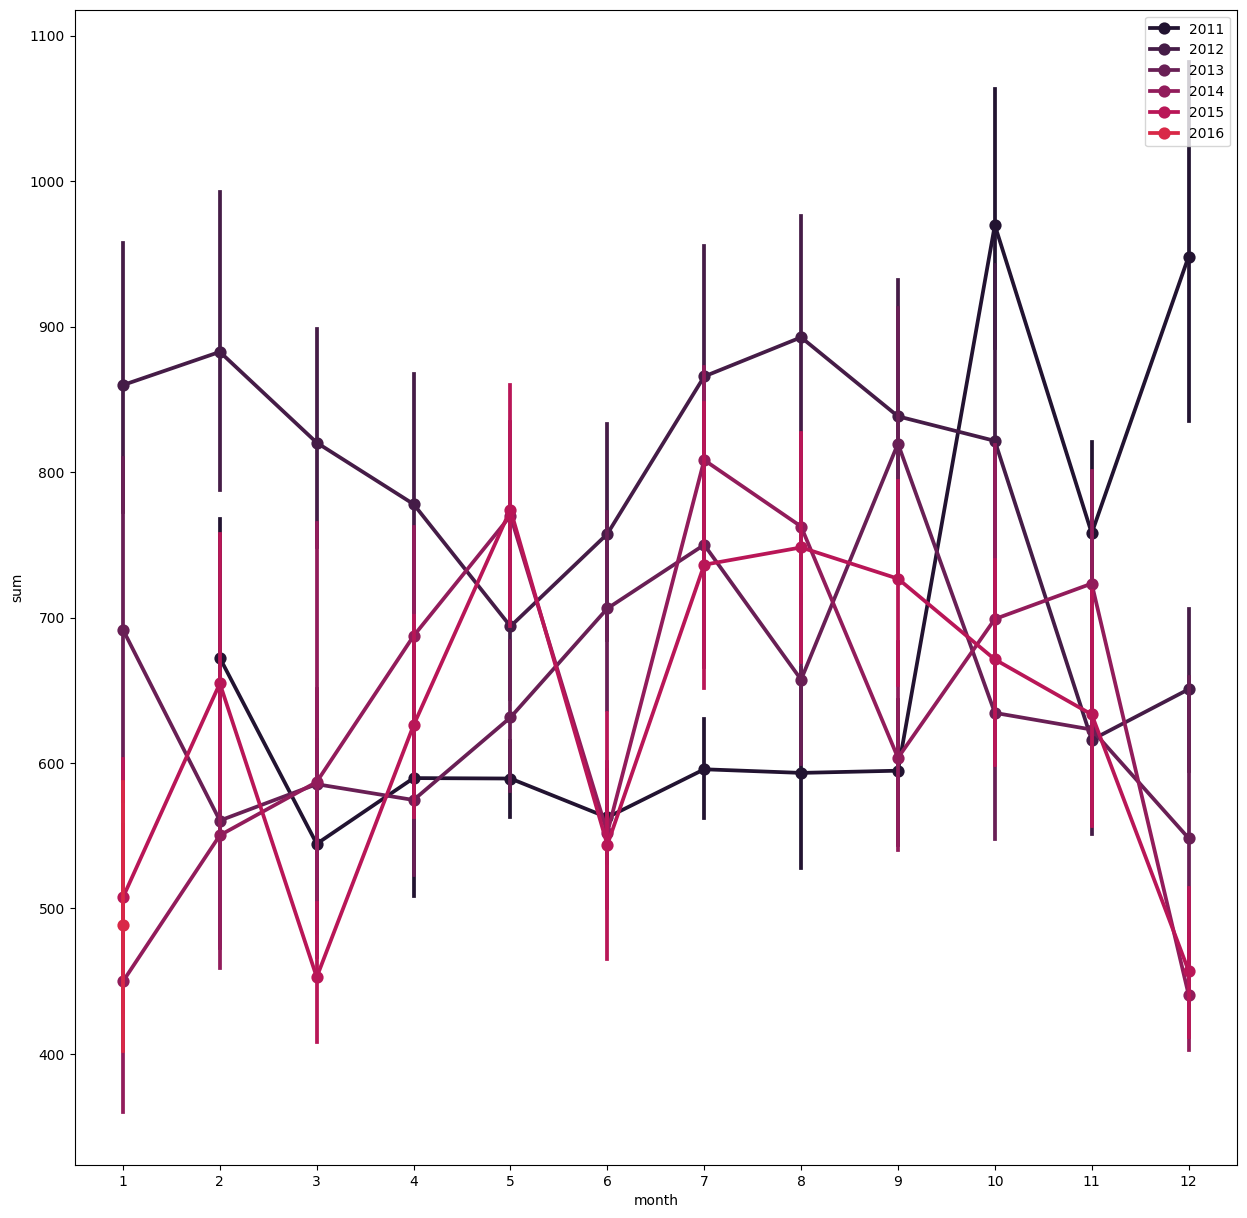

In [ ]:
revenue_copy = copy(daily_revenue_exp)
# yearly_index = revenue_copy.index.to_period('Y')
# revenue_exp_copy.index = yearly_index

revenue_copy["month"] = revenue_copy.index.month
revenue_copy["year"] = revenue_copy.index.year
cmap = sns.color_palette("rocket", as_cmap=False, n_colors=10)
# Step 3: Now run month_plot
# tsaplots.month_plot(revenue_exp_copy['sum']);

plt.figure(figsize=(15, 15))
sns.pointplot(x="month", y="sum", hue="year", data=revenue_copy, palette=cmap)
plt.legend(loc="upper right")

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

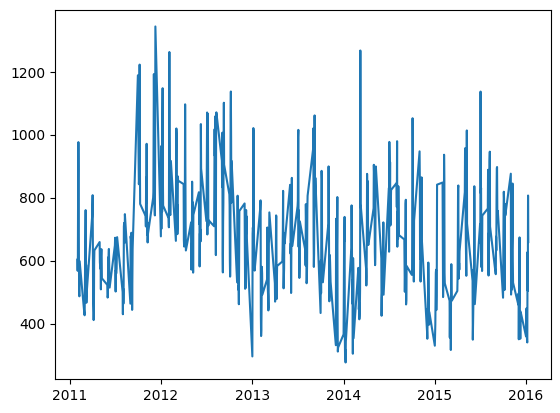

In [ ]:
x = pd.get_dummies((revenue_copy.index.month % 12).astype(str), prefix="s")
plt.plot(revenue_copy["sum"])
plt.plot(
    pd.Series(
        sm.OLS(revenue_copy["sum"].values, sm.add_constant(x.values))
        .fit()
        .predict(sm.add_constant(x.values)),
        index=revenue_copy["sum"].index,
    )
)

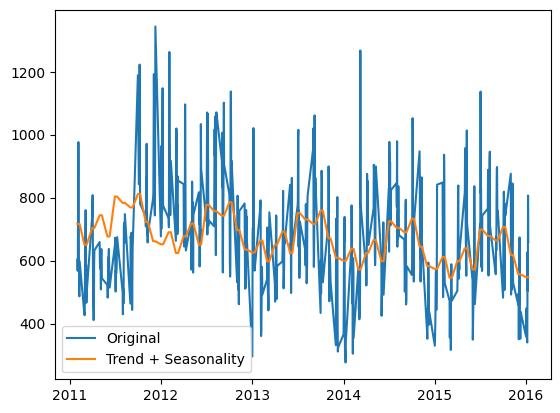

In [ ]:
x = pd.get_dummies((revenue_copy.index.month % 12).astype(str), prefix="s")
x["trend"] = revenue_copy.index.year * 12 + revenue_copy.index.month

# Ensure all columns are float for compatibility
x = x.astype(float)

# Fit model
model = sm.OLS(revenue_copy["sum"].values, sm.add_constant(x.values)).fit()
fitted_values = model.predict(sm.add_constant(x.values))

# Plot
plt.plot(revenue_copy["sum"], label="Original")
plt.plot(
    pd.Series(fitted_values, index=revenue_copy.index), label="Trend + Seasonality"
)
plt.legend()
plt.show()

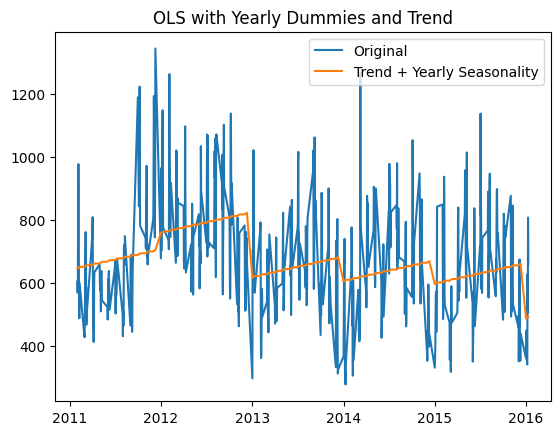

In [ ]:
x = pd.get_dummies(revenue_copy.index.year.astype(str), prefix="y")

# Add a trend variable (optional but usually useful)
x["trend"] = range(len(x))  # or use revenue_copy.index.to_series().rank().values

# Ensure all columns are float for compatibility
x = x.astype(float)

# Fit the OLS model
model = sm.OLS(revenue_copy["sum"].values, sm.add_constant(x.values)).fit()
fitted_values = model.predict(sm.add_constant(x.values))

# Plot the results
plt.plot(revenue_copy["sum"], label="Original")
plt.plot(
    pd.Series(fitted_values, index=revenue_copy.index),
    label="Trend + Yearly Seasonality",
)
plt.legend()
plt.title("OLS with Yearly Dummies and Trend")
plt.show()

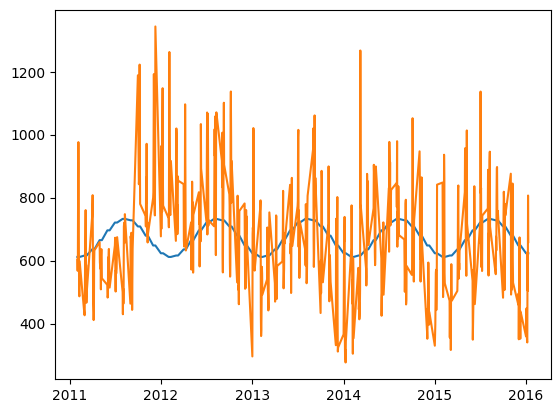

In [ ]:
x = np.c_[
    np.sin(2 * np.pi * (revenue_copy["sum"].index.month.values % 12) / 12),
    np.cos(2 * np.pi * (revenue_copy["sum"].index.month.values % 12) / 12),
]

ses_pred = (
    sm.OLS(revenue_copy["sum"].values, sm.add_constant(x))
    .fit()
    .predict(sm.add_constant(x))
)

plt.plot(pd.Series(ses_pred, index=revenue_copy["sum"].index))
plt.plot(revenue_copy["sum"])


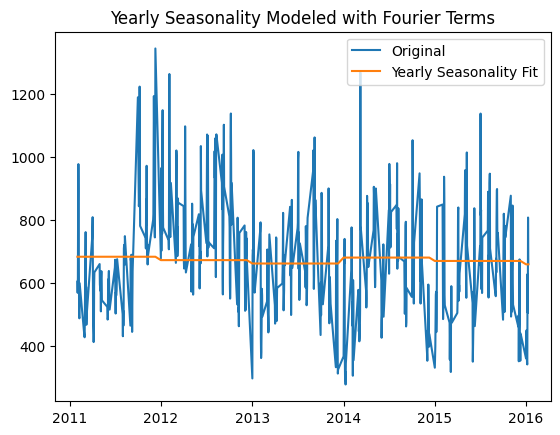

In [ ]:
years = revenue_copy.index.year

x = np.c_[np.sin(2 * np.pi * years), np.cos(2 * np.pi * years)]

# Fit OLS model with seasonal Fourier terms
model = sm.OLS(revenue_copy["sum"].values, sm.add_constant(x)).fit()
ses_pred = model.predict(sm.add_constant(x))

# Plot results
plt.plot(revenue_copy.index, revenue_copy["sum"], label="Original")
plt.plot(revenue_copy.index, ses_pred, label="Yearly Seasonality Fit")
plt.legend()
plt.title("Yearly Seasonality Modeled with Fourier Terms")
plt.show()

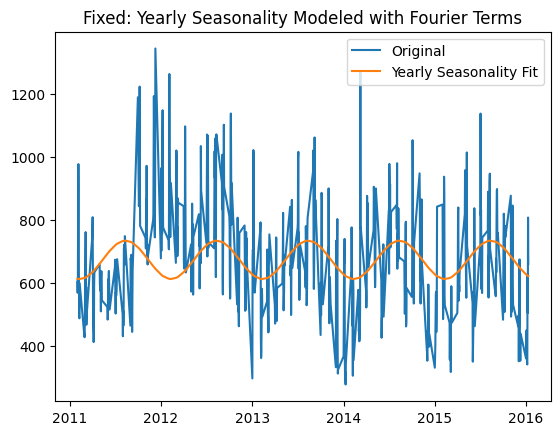

In [ ]:
t = revenue_copy.index.dayofyear / 365.25

# Fourier terms for annual seasonality
x = np.c_[np.sin(2 * np.pi * t), np.cos(2 * np.pi * t)]

# Fit OLS model
model = sm.OLS(revenue_copy["sum"].values, sm.add_constant(x)).fit()
ses_pred = model.predict(sm.add_constant(x))

# Plot
plt.plot(revenue_copy.index, revenue_copy["sum"], label="Original")
plt.plot(revenue_copy.index, ses_pred, label="Yearly Seasonality Fit")
plt.title("Fixed: Yearly Seasonality Modeled with Fourier Terms")
plt.legend()
plt.show()

In [ ]:
t = revenue_copy.index.dayofyear / 365.25

# Fourier terms for annual seasonality
x = np.c_[np.sin(2 * np.pi * t), np.cos(2 * np.pi * t)]

# Fit OLS model
model = sm.OLS(revenue_copy["sum"].values, sm.add_constant(x)).fit()
ses_pred = model.predict(sm.add_constant(x))

# Plot
plt.plot(revenue_copy.index, revenue_copy["sum"], label="Original")
plt.plot(revenue_copy.index, ses_pred, label="Yearly Seasonality Fit")
plt.title("Fixed: Yearly Seasonality Modeled with Fourier Terms")
plt.legend()
plt.show()

## Проверка на стационарность

# Модели
Так как у нас имеется долговоременная сезонность можно применить Ряды Фурье. 


## Ряды Фурье

In [ ]:
from scipy.stats import shapiro, ttest_1samp
from sktime.transformations.series.boxcox import BoxCoxTransformer
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.tsa.stattools import adfuller, kpss


In [ ]:
from sklearn.metrics import r2_score
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteError,
    MeanAbsolutePercentageError,
)


def metrics_report(y_true, y_pred):
    """
    Функция оценки качества прогноза. Оценивает персентили распределения ошибки
    (медиану, среднее, 3й квартиль и 95-персентиль)
    по абсолютной и относительной процентной ошибки для прогноза с помощью модели (y_pred) и
    для базового прогноза, равному среднему значению вр.

    """

    mape_func = MeanAbsolutePercentageError()
    mae_func = MeanAbsoluteError()

    y_true_mean = y_true.mean() * np.ones(shape=(len(y_true),))

    mapes = mape_func.evaluate_by_index(y_true, y_pred) * 100
    maes = mae_func.evaluate_by_index(y_true, y_pred)

    mapes_zero = mape_func.evaluate_by_index(y_true, y_true_mean) * 100
    maes_zero = mae_func.evaluate_by_index(y_true, y_true_mean)

    def quan_75(y, quan=0.75):
        return y.quantile(quan)

    def quan_95(y, quan=0.95):
        return y.quantile(quan)

    stats_list = ["mean", "median", quan_75, quan_95, "std"]

    res = pd.DataFrame(
        [
            maes.agg(stats_list),
            maes_zero.agg(stats_list),
            mapes.agg(stats_list),
            mapes_zero.agg(stats_list),
        ],
        index=["maes", "maes_zero", "mapes", "mapes_zero"],
    )

    res.loc["r2", :] = r2_score(y_true, y_pred)

    return res

In [ ]:
t_max = 5  # 10 лет
T = 365  # период колебаний - дней в году
N = t_max * T  # всего наблюдений в генерируемом ВР
bandwidth = 1 / N
t = np.linspace(0, t_max, N)
freq_ny = 1 / 2  # Nyquist freq
tot_freq_cnt = N / 2

In [ ]:
from scipy import fft

t = revenue_copy.index.dayofyear / 365.25
fft_values = fft.fft(revenue_copy["sum"], axis=0)
N = len(revenue_copy)
freq_values = fft.fftfreq(
    N,
)

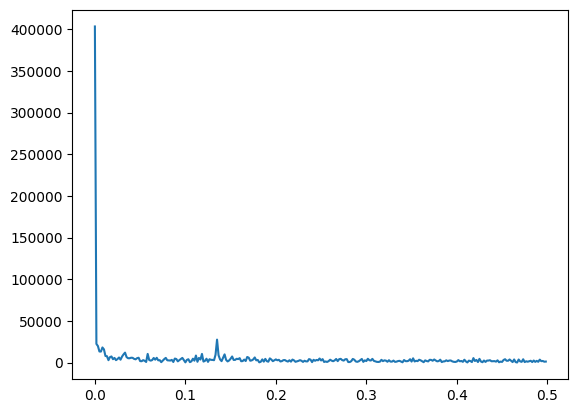

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(freq_values[: N // 2], np.abs(fft_values[: N // 2]));

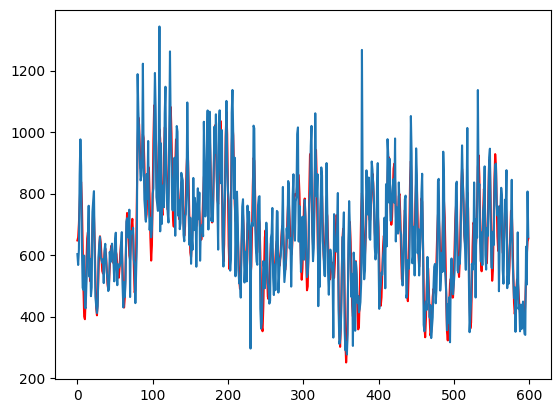

In [ ]:
# fourier.sort_values(by='amp',ascending=False,inplace=True)
filtered = fft_values.copy()
filtered[(np.abs(freq_values) > 0.15)] = 0

# обратное преобразование Фурье
signal_filtered = np.real(fft.ifft(filtered, axis=0))
plt.plot(signal_filtered, c="red")
plt.plot(revenue_copy["sum"].values)

In [134]:
filtered = fft_values.copy()
filtered[~((np.abs(freq_values) < 0.12) & (np.abs(freq_values) > 0.09))] = 0

In [135]:
# обратное преобразование Фурье
signal_filtered = np.real(fft.ifft(filtered, axis=0))

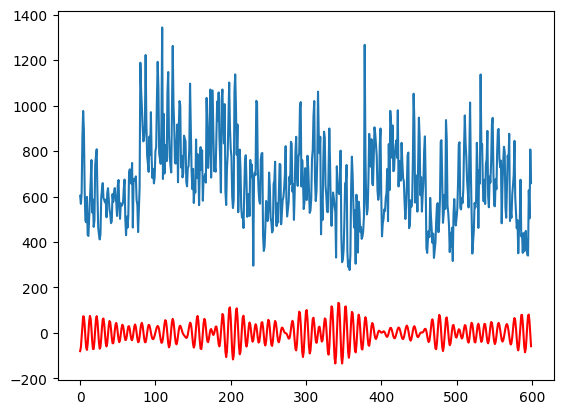

In [ ]:
plt.plot(signal_filtered, c="red")
plt.plot(revenue_copy["sum"].values)

In [ ]:
def BC_inverse(y, lam, sig):
    """Back transform Box-Cox with Bias correction.
    See https://robjhyndman.com/hyndsight/backtransforming
    """
    if lam == 0:
        return np.exp(y) * (1 + 0.5 * sig**2)
    else:
        res = np.power(lam * y + 1.0, 1 / lam)
        res *= 1 + 0.5 * sig**2 * (1 - lam) / (lam * y + 1.0) ** 2
        return res

Тк нельзя применять ряды Фурье к нестационарным рядам, применяем детрендирование и преобразование Бокса Кокса

<Axes: xlabel='date'>

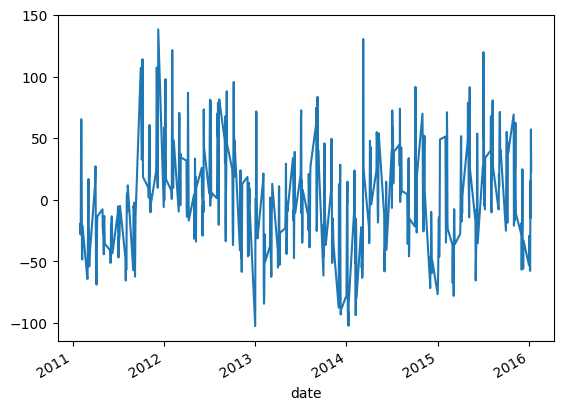

In [ ]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Detrender

transformer = BoxCoxTransformer(method="guerrero", sp=12)
revenue_box = transformer.fit_transform(revenue_copy["sum"])

revenue_detrend = Detrender(PolynomialTrendForecaster(degree=2)).fit_transform(
    revenue_box
)

revenue_detrend.plot()

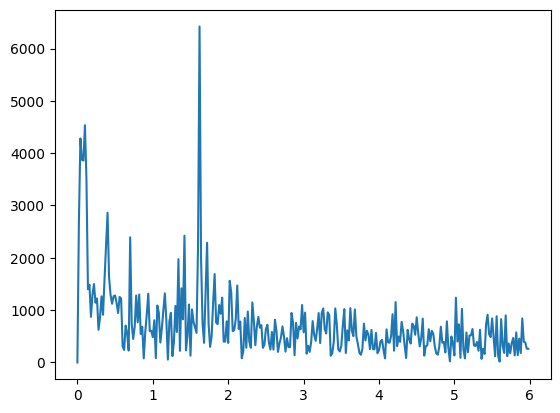

In [ ]:
fft_values = fft.fft(revenue_detrend, axis=0)
N = len(revenue_copy)
freq_values = fft.fftfreq(N, 1 / 12)
fig, ax = plt.subplots(1)
ax.plot(freq_values[: N // 2], np.abs(fft_values[: N // 2]));

In [ ]:
filtered = fft_values.copy()
filtered[np.abs(freq_values) > 4.5] = 0
signal_filtered = np.real(fft.ifft(filtered, axis=0))

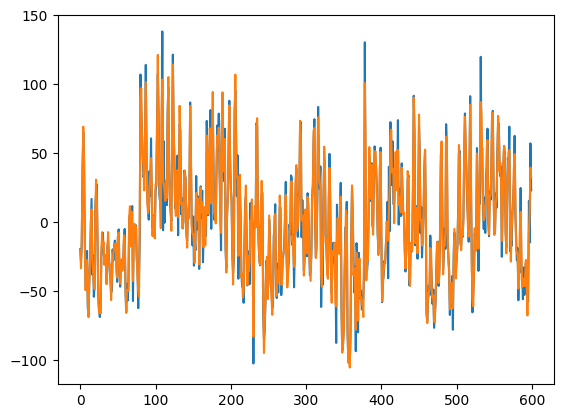

In [141]:
plt.plot(revenue_detrend.values)
plt.plot(signal_filtered)

In [ ]:
def fourierExtrapolation(x, n_predict, n_harm=20, inner_freq=1.0):
    """
    Функция для экстраполяции рядов Фурье. По вр х делает предикт на n_predict шагов
    с помощью топ n_harm гармоник по амплитуде.
    Возвращает исходный ряд + экстраполяцию на n_predict шагов

    https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
    """
    n = x.size
    t = np.arange(0, n)

    x_freqdom = fft.fft(x, axis=0)  # x in frequency domain
    f = fft.fftfreq(n, inner_freq)  # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[: 1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n  # amplitude
        phase = np.angle(x_freqdom[i])  # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t * inner_freq + phase)
    return restored_sig

Лучше смоделировать на 365 дней

In [ ]:
test_idx = 40
ses_extra = fourierExtrapolation(revenue_detrend.iloc[:-test_idx], test_idx, 25)
x_freqdom = fft.fft(revenue_detrend.iloc[:-test_idx], axis=0)
n = len(revenue_detrend.iloc[:-test_idx])
fourier = pd.DataFrame(x_freqdom)
fourier["freq"] = fft.fftfreq(n, 1 / 12)
fourier["amp"] = np.absolute(x_freqdom) / n
fourier["phase"] = np.angle(x_freqdom)


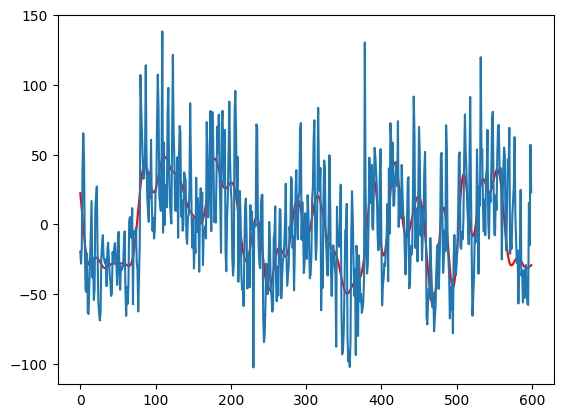

In [ ]:
plt.plot(fourierExtrapolation(revenue_detrend.iloc[:-test_idx], 40, 25), c="red")
plt.plot(revenue_detrend.values)

### Автокорреляция Частичная автокорреляция

## EMA

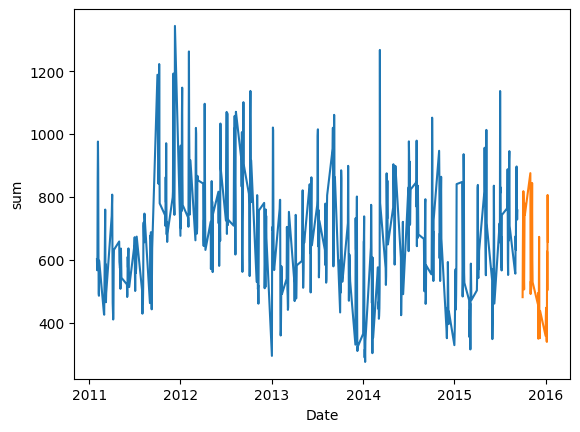

In [ ]:
revenue_test = revenue_copy.iloc[-40:]
revenue = revenue_copy.iloc[:-40]

fig, ax = plt.subplots(1, 1)
ax.plot(revenue.index, revenue["sum"])
ax.plot(revenue_test.index, revenue_test["sum"])
ax.set_xlabel("Date")
ax.set_ylabel("sum");


d:\gleb\ITMO\Time_Series\time_series_itmo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\gleb\ITMO\Time_Series\time_series_itmo\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
d:\gleb\ITMO\Time_Series\time_series_itmo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\gleb\ITMO\Time_Series\time_series_itmo\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported inde

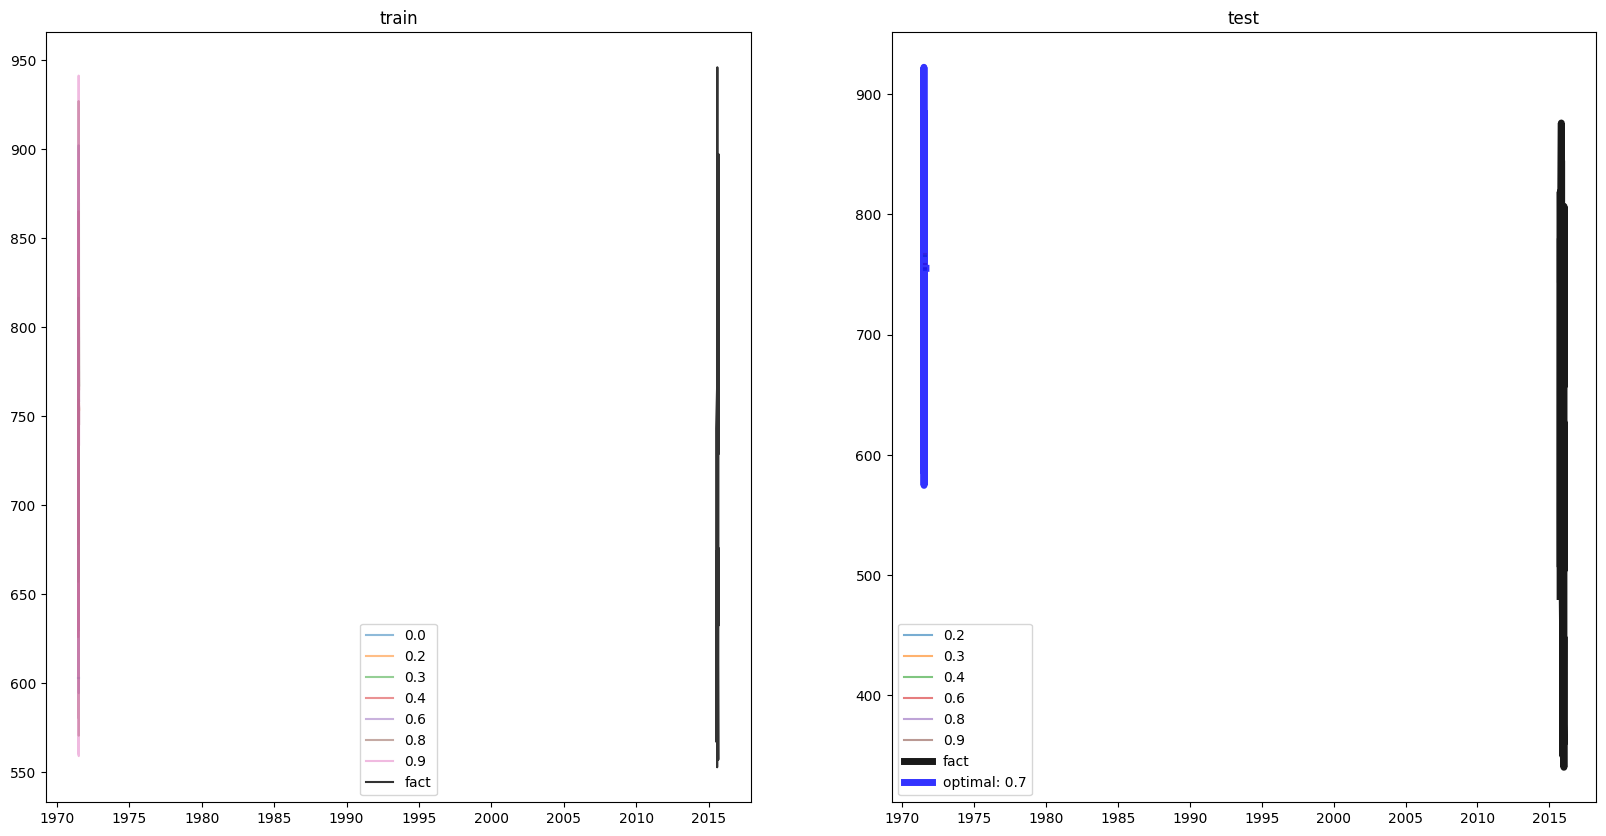

In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(20,10))
# for alpha in np.arange(0,1,0.15):
#     es1 = ExponentialSmoothing(revenue['sum'],initialization_method=None )
#     es1 = es1.fit(smoothing_level=alpha)
#     ax[0].plot(es1.predict(start=len(revenue)-24,end= len(revenue)),label=np.round(alpha,1),alpha = 0.5)

#     if alpha>0:
#         ax[1].plot(es1.forecast(len(revenue_test)),
#                    label=np.round(alpha,1),alpha = 0.6)


# ax[0].plot(revenue['sum'].iloc[-24:],alpha = 0.8,c='black',label='fact')
# ax[0].set_title("train")
# ax[1].plot(revenue_test['sum'],alpha = 0.9,c='black',label='fact',linewidth=5)
# ax[1].set_title("test")

# es1 = ExponentialSmoothing(revenue['sum'],initialization_method='estimated')
# es1 = es1.fit()
# ax[1].plot(es1.predict(start=len(revenue)-20,end= len(revenue)+40),
#            label='optimal: ' + str(np.round(es1.params['smoothing_level'],1)),
#            alpha = 0.8,
#            linewidth = 5,
#           c='blue')

# ax[0].legend()
# ax[1].legend()

In [ ]:
# ax = merged_new.plot(y='revenue', legend=False,marker='o')
# ax.set_ylabel('revenue')
# ax1 = ax.twinx()
# ax.set_xlabel('date')
# plt.xticks(rotation=90);

EMA не заработала тк ряд нестационарен

## SARIMA

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from itertools import product


def calc_optimum_sarima(ts, max_p, max_P, max_q, max_Q, d, D, seasonal_period=12):
    """
    Подбор оптимальных гиперпараметров модели ARIMA с помощью критерия Акаике.
    Идет перебор всех вариантов (p,P,q,Q) в пределах (0,max_p)*(0,max_P)*(0,max_q)*(0,max_Q)

    """

    best_bic = float("inf")

    ps = range(0, max_p + 1)
    qs = range(0, max_q + 1)
    Ps = range(0, max_P + 1)
    Qs = range(0, max_Q + 1)
    parameters = product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)

    print(len(parameters_list))

    results = []
    for param in parameters_list:
        # try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model = sm.tsa.SARIMAX(
                ts,
                order=(param[0], d, param[1]),
                seasonal_order=(param[2], D, param[3], seasonal_period),
            ).fit(disp=-1)
        # выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print("wrong parameters:", param)
            continue
        aic = model.aic
        bic = model.bic
        # сохраняем лучшую модель, aic, параметры
        if bic < best_bic:
            best_model = model
            best_bic = aic
            best_param = param
        results.append([param, aic, bic])

    return results, best_model


In [ ]:
revenue["pass_box"] = transformer.fit_transform(revenue["sum"])
revenue["pass_box_diff12"] = revenue.pass_box - revenue.pass_box.shift(12)
revenue["pass_box_diff1"] = revenue.pass_box_diff12 - revenue.pass_box_diff12.shift(1)

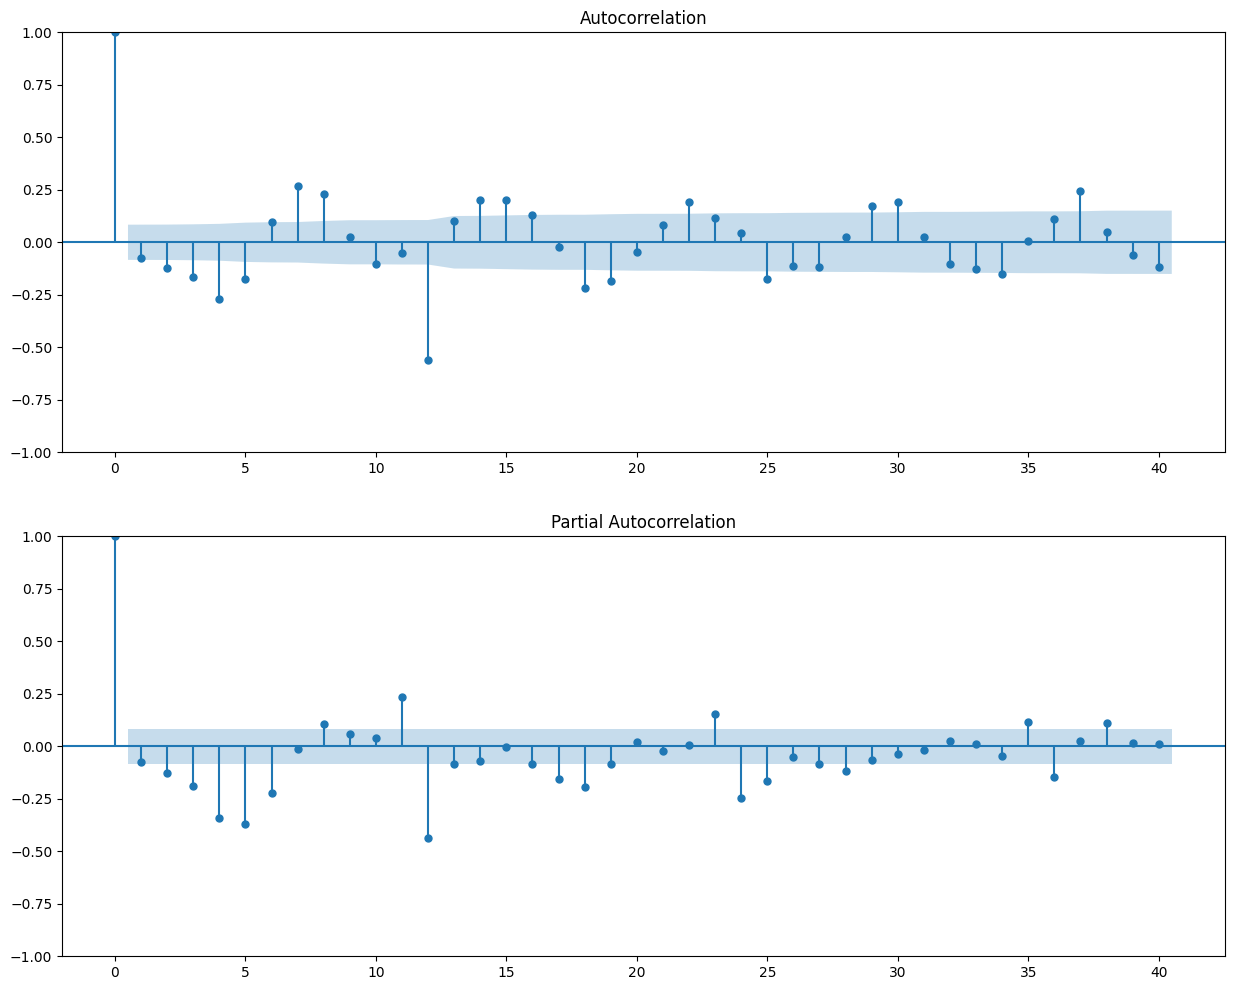

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
tsaplots.plot_acf(revenue["pass_box_diff1"].dropna(), ax=ax[0], lags=40)
tsaplots.plot_pacf(revenue["pass_box_diff1"].dropna(), ax=ax[1], lags=40);

По автокорееляции определяем MA 1 или 5

Сезонность _значительный лаг кратный 12 (период) свидеьельствует о наличии сезонности_ следую
По частичной автокорреляции AR 

q = 5 or 7 параметр MA
Q = 1 параметр Сезонность

p = 6 параметр модели авторегрессии
P = 1 or 3 better 1

In [ ]:
_, mod = calc_optimum_sarima(
    revenue["pass_box"], max_p=6, max_P=1, max_q=5, max_Q=1, d=1, D=1
)

168


In [ ]:
def check_fit(resids):
    """
    Проверка остатков на равенство нулю среднего, на стационарность, нормальность, отсутствие автокорреляций и
    гомоскедастичность.
    """

    # mean = 0
    mean_t, mean_pval = ttest_1samp(resids, 0)

    # stationary
    stat_t, stat_pval = adfuller(resids, maxlag=6)[:2]

    # normality
    norm_t, norm_pval = shapiro(resids)

    # autocorr
    autocor_pval = (
        acorr_ljungbox(resids, model_df=0, return_df=True)["lb_pvalue"] < 0.05
    ).sum() == 0

    # heteroscedasticity
    lm, lm_pval, ff, ff_pval = het_breuschpagan(
        resids, sm.add_constant(resids.reset_index().index)
    )

    records = {
        "mean_resids": np.mean(resids),
        "mean_t": mean_t,
        "mean_pval": mean_pval,
        "stationary_t": stat_t,
        "stationary_pval": 1
        - stat_pval,  # поменяли знак, чтобы желаемый результат всех проверок p_value>0.05
        "autocor_pval": autocor_pval,
        "norm_t": norm_t,
        "norm_pval": norm_pval,
        "heteroscedasticity_t": ff,
        "heteroscedasticity_pval": ff_pval,
        "check_result": (mean_pval > 0.05)
        & (stat_pval < 0.05)
        & (norm_pval > 0.05)
        & (ff_pval > 0.05)
        & autocor_pval,
    }

    return records

In [ ]:
def plot_diagnostics(data, dt_col, resid_col):
    """
    Строим визуальную оценку остатков - остатки as-is, гистограмма остатков, qqplot и автокореляционную функцию.
    """

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # resid as-is
    sns.lineplot(data=data, x=dt_col, y=resid_col, ax=ax[0][0])
    ax[0][0].axhline(0, c="k", linestyle="--")
    ax[0][0].set_title("Динамика ошибок прогноза")
    ax[0][0].set_xlabel(None)
    ax[0][0].set_ylabel(None)
    ax[0][0].xaxis.set_major_locator(plt.MaxNLocator(4))

    # hist
    sns.histplot(data=data, x=resid_col, ax=ax[0][1])
    ax[0][1].set_title("Гистограмма ошибок прогноза")
    ax[0][1].set_xlabel(None)
    ax[0][1].set_ylabel(None)

    # acf
    sm.graphics.tsa.plot_acf(data[resid_col], lags=10, ax=ax[1][0])
    ax[1][0].set_title("Автокореляции ошибок прогноза")
    ax[1][0].set_xlabel(None)
    ax[1][0].set_ylabel(None)

    # qq
    qqplot(data[resid_col], line="s", ax=ax[1][1])
    ax[1][1].set_title("Q-q график ошибок прогноза")
    ax[1][1].set_xlabel(None)
    ax[1][1].set_ylabel(None)

In [158]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             pass_box   No. Observations:                  560
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -2224.603
Date:                              Tue, 13 May 2025   AIC                           4463.206
Time:                                      22:48:06   BIC                           4493.337
Sample:                                           0   HQIC                          4474.984
                                              - 560                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2630      0.033     38.564      0.000       1.199       1.327
ar.L2         -0.9116      0.028    -32.387      0.000      -0.967      -0.856
ma.L1         -1.7385      0.053    -32.805      0.000      -1.842      -1.635
ma.L2          1.3803      0.084     16.506      0.000       1.216       1.544
ma.L3         -0.4472      0.049     -9.204      0.000      -0.542      -0.352
ma.S.L12      -0.9412      0.027    -34.699      0.000      -0.994      -0.888
sigma2       189.2838      8.854     21.379      0.000     171.931     206.637
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                76.86
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.30
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
check_fit(mod.resid)

{'mean_resids': np.float64(0.39936303000538864),
 'mean_t': np.float64(0.6396839848211521),
 'mean_pval': np.float64(0.5226401355929047),
 'stationary_t': np.float64(-17.506456398523305),
 'stationary_pval': np.float64(1.0),
 'autocor_pval': np.True_,
 'norm_t': np.float64(0.9641834597456758),
 'norm_pval': np.float64(1.9203365826192107e-10),
 'heteroscedasticity_t': np.float64(2.401781576288246),
 'heteroscedasticity_pval': np.float64(0.12176410670805336),
 'check_result': np.False_}

In [163]:
mod.resid

date
2011-02-01    97.795336
2011-02-02    -3.835123
2011-02-03     5.271890
2011-02-04    24.430942
2011-02-05    10.755047
                ...    
2015-09-06    10.327569
2015-09-07     8.089646
2015-09-08     3.072875
2015-09-09     1.997206
2015-09-10     4.946427
Length: 560, dtype: float64

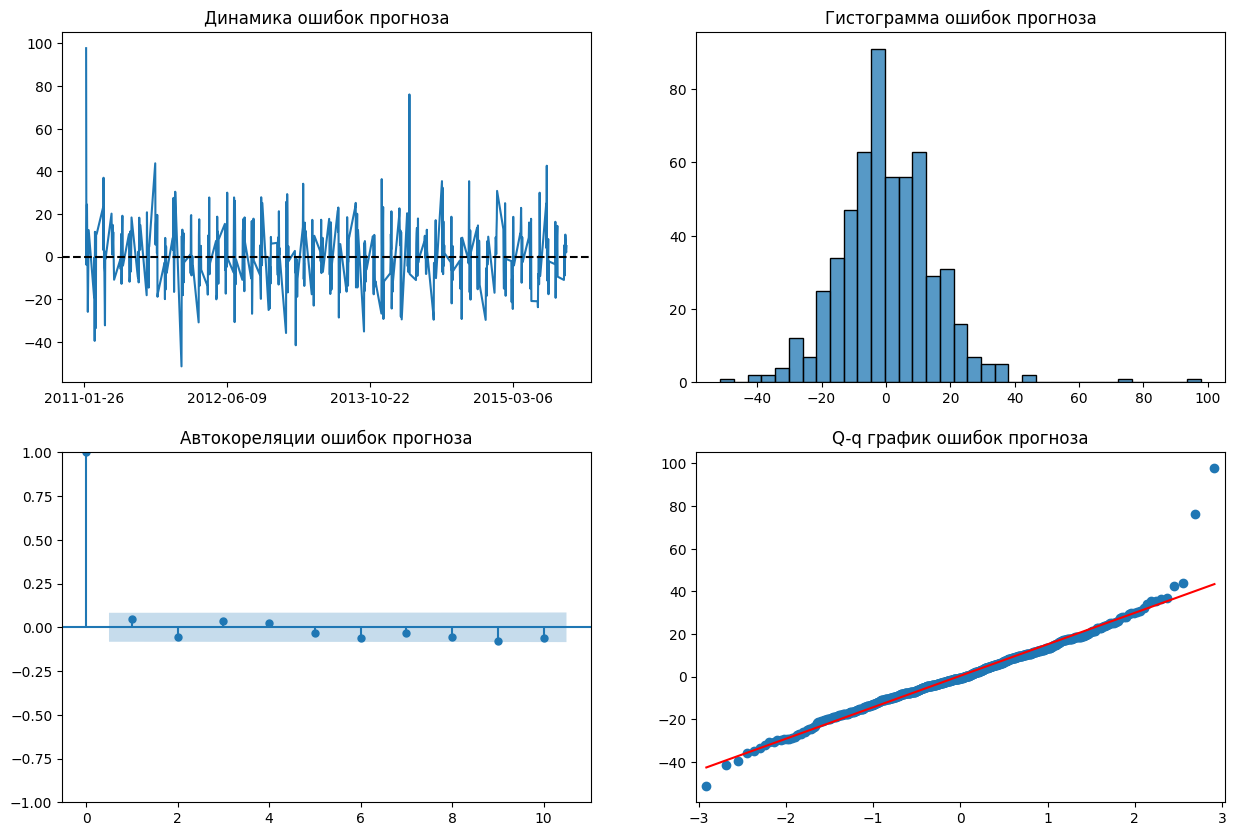

In [ ]:
# plot_diagnostics(mod.resid.reset_index(),'Month',0)
resid_df = mod.resid.reset_index()
resid_df.columns = ["Date", "Residual"]
plot_diagnostics(resid_df, "Date", "Residual")

Остатки распределены нормально, значение на графике автокорелляции не стат значимы

In [ ]:
revenue_test["forecast"] = transformer.inverse_transform(mod.forecast(40))

In [175]:
a = mod.forecast(24)

In [176]:
b = transformer.inverse_transform(a)
b

560    724.977512
561    782.198248
562    823.924225
563    866.880399
564    829.794496
565    734.310309
566    733.097743
567    724.748909
568    790.164072
569    805.699355
570    870.813935
571    870.105473
572    776.134187
573    731.389689
574    717.401017
575    782.044529
576    827.294015
577    811.953978
578    839.084995
579    791.726400
580    784.314617
581    741.963284
582    798.836935
583    843.853961
Name: predicted_mean, dtype: float64

In [ ]:
revenue_test["sum"].shape[0]

40

In [181]:
d = mod.forecast(40)
e = transformer.inverse_transform(d)
e

560    724.977512
561    782.198248
562    823.924225
563    866.880399
564    829.794496
565    734.310309
566    733.097743
567    724.748909
568    790.164072
569    805.699355
570    870.813935
571    870.105473
572    776.134187
573    731.389689
574    717.401017
575    782.044529
576    827.294015
577    811.953978
578    839.084995
579    791.726400
580    784.314617
581    741.963284
582    798.836935
583    843.853961
584    813.497362
585    806.157595
586    782.700750
587    802.373735
588    797.170698
589    760.981280
590    806.478186
591    802.841623
592    833.150361
593    797.675076
594    831.174946
595    838.017238
596    782.154638
597    777.031650
598    779.566610
599    830.392070
Name: predicted_mean, dtype: float64

In [ ]:
e.index = revenue_test.index
revenue_test["forecast"] = e
revenue_test["forecast"]

date
2015-10-01    724.977512
2015-10-02    782.198248
2015-10-03    823.924225
2015-10-04    866.880399
2015-10-05    829.794496
2015-10-06    734.310309
2015-10-07    733.097743
2015-10-08    724.748909
2015-10-09    790.164072
2015-10-10    805.699355
2015-11-01    870.813935
2015-11-02    870.105473
2015-11-03    776.134187
2015-11-04    731.389689
2015-11-05    717.401017
2015-11-06    782.044529
2015-11-07    827.294015
2015-11-08    811.953978
2015-11-09    839.084995
2015-11-10    791.726400
2015-12-01    784.314617
2015-12-02    741.963284
2015-12-03    798.836935
2015-12-04    843.853961
2015-12-05    813.497362
2015-12-06    806.157595
2015-12-07    782.700750
2015-12-08    802.373735
2015-12-09    797.170698
2015-12-10    760.981280
2016-01-01    806.478186
2016-01-02    802.841623
2016-01-03    833.150361
2016-01-04    797.675076
2016-01-05    831.174946
2016-01-06    838.017238
2016-01-07    782.154638
2016-01-08    777.031650
2016-01-09    779.566610
2016-01-10    830.39

<Axes: xlabel='date'>

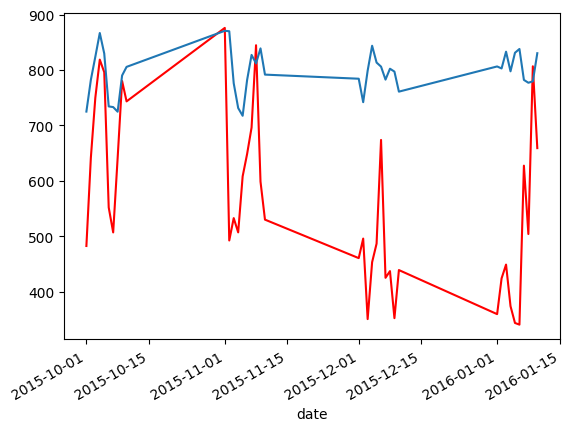

In [ ]:
revenue_test["sum"].plot(c="red")
revenue_test["forecast"].plot()


Первый месяц прогнозы достаточно хороши и визуально неплохо аппроксимирует ряд (за исключением сильных колебаний), однако (S)ARIMA есть (S)ARIMA и с 4-5 ноября прогнозы начинают стремиться к среднему.

In [21]:
# merged_new.nunique()

In [ ]:
# merged_df[["event_name_1", "event_type_1", "event_name_2", "event_type_2"]] = merged_df[
#     ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]
# ].fillna("None")
# merged_df["sell_price"] = merged_df["sell_price"].fillna(method="ffill")
# # Or
# # merged_df['sell_price'] = merged_df['sell_price'].fillna(method='bfill')

# merged_df["was_event_1_nan"] = merged_df["event_name_1"].isnull().astype(int)
# merged_df["event_name_1"] = merged_df["event_name_1"].fillna(
#     "None"
# )  # Still fill the original NaN
# # merged_df[['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']] = merged_df[['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']].fillna('None')
# merged_df["cnt"] = merged_df["cnt"].fillna(0)


In [ ]:
# nan_analysis = merged_df.isna().groupby(merged_df["item_id"], dropna=False).sum().reset_index()
# event_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
# merged_df[event_cols] = merged_df[event_cols].fillna('No Event')
# merged_df['CASHBACK_STORE_2'] = merged_df['CASHBACK_STORE_2'].fillna(0)
# merged_df

,store_id,item_id,date_id,cnt,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_2,sell_price
0,STORE_2,STORE_2_085,1,3,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
1,STORE_2,STORE_2_085,2,8,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
2,STORE_2,STORE_2_085,3,0,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
3,STORE_2,STORE_2_085,4,3,2011-02-01,11101.0,Tuesday,4.0,2.0,2011.0,No Event,No Event,No Event,No Event,1.0,1.0
4,STORE_2,STORE_2_085,5,0,2011-02-02,11101.0,Wednesday,5.0,2.0,2011.0,No Event,No Event,No Event,No Event,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27280,STORE_2,STORE_2_716,1815,2,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
27281,STORE_2,STORE_2_716,1816,1,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
27282,STORE_2,STORE_2_716,1817,1,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
27283,STORE_2,STORE_2_716,1818,1,NaN,NaN,NaN,NaN,NaN,NaN,No Event,No Event,No Event,No Event,0.0,NaN
